In [11]:
import h5py
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import spearmanr, kendalltau
from activ.analytics import heatmap
from activ.clustering import UmapClusteringResults

In [12]:
file = '/Users/ahyeon/Desktop/activ/results/mahalanobis_output/umap_cluster_uoinmf-mahalanobis.h5'

In [13]:
f = h5py.File(file, 'r')
print(list(f.keys()))

['cluster_sizes', 'clusters', 'norm_score', 'score', 'seed', 'umap_dimensions', 'umap_embeddings', 'umap_embeddings_dimscale', 'umap_min_dist', 'umap_n_neighbors']


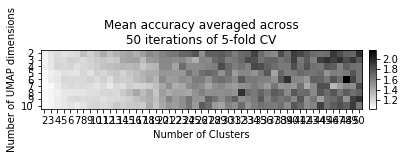

In [25]:
results = UmapClusteringResults(file)
ret = results.make_heatmap()

In [83]:
score = f['score'][:]
norm_score = f['norm_score'][:]
clusters = f['clusters'][:]
cluster_sizes = f['cluster_sizes'][:]
score.shape

(50, 9, 49, 5)

In [84]:
score1 = np.mean(score, axis=0).mean(axis=2)
norm_score1 = np.mean(norm_score, axis=0).mean(axis=2).mean(axis=0)
score1 = score1.mean(axis=0)

In [85]:
pdf = PdfPages('/Users/ahyeon/Desktop/activ/results/mahalanobis_output/mahalanobis_clusters_vs_logacc.pdf')

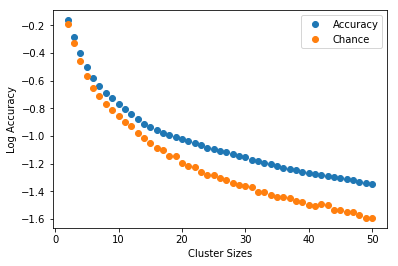

In [86]:
fig, ax = plt.subplots()
ax.plot(cluster_sizes, np.log10(score1), 'o', label='Accuracy')
ax.plot(cluster_sizes, np.log10(norm_score1), 'o', label='Chance')
plt.xlabel('Cluster Sizes')
plt.ylabel('Log Accuracy')
ax.legend()
pdf.savefig()

AttributeError: 'NoneType' object has no attribute 'endStream'

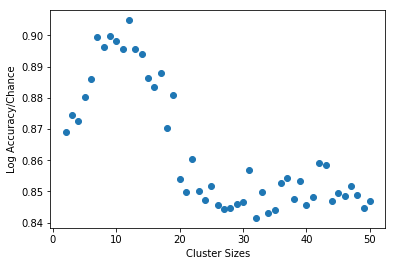

In [91]:
plt.plot(cluster_sizes, np.log10(score1)/np.log10(norm_score1), 'o')
plt.xlabel('Cluster Sizes')
plt.ylabel('Log Accuracy/Chance')
pdf.savefig()

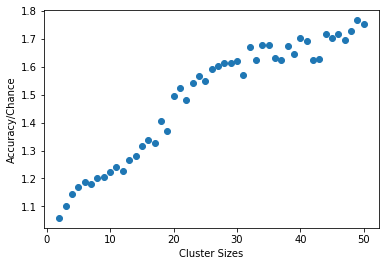

In [88]:
plt.plot(cluster_sizes, score1/norm_score1, 'o')
plt.xlabel('Cluster Sizes')
plt.ylabel('Accuracy/Chance')
pdf.savefig()

In [89]:
pdf.close()

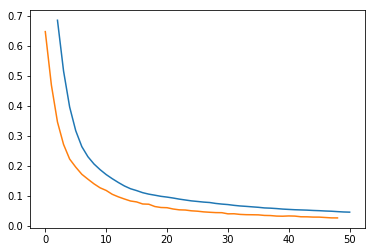

In [65]:
plt.plot(cluster_sizes, score1, norm_score1)